In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wavfile

44100
(2845440, 2)


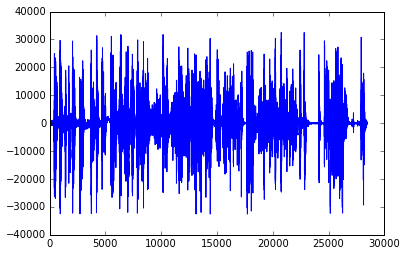

In [2]:
rate, piano = wavfile.read('piano.wav')
print(rate)
print(piano.shape)
plt.figure()
plt.plot(piano[0::100,0])

In [3]:
Nsec = np.floor(piano.shape[0]/rate).astype('int')
print(Nsec)

64


In [6]:
from numpy.fft import fft
from numpy import hamming, hanning
import scipy.signal as signal

def PianoFFT(yt, fs):
    dt = 1.0/fs
    Nt = len(yt)
    tt = np.arange(0, Nt*dt, dt)
    Nf = len(yt)
    df = fs / Nf
    ff = np.arange(0,fs,df)
    yf = np.abs(fft(yt*hanning(Nf)))
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(tt, yt)
    plt.subplot(2,1,2)
    plt.plot(ff,yf)
    plt.xlim([0,2000])
    
    return yf, ff
    
def PianoWelch(yt, fs):
    dt = 1.0/fs
    Nt = len(yt)
    tt = np.arange(0, Nt*dt, dt)
    Nf = len(yt)
    nperseg = np.round(fs/20)
    noverlap = np.round(nperseg/2)
    ff, yf = signal.welch(yt, fs=fs, nperseg=nperseg, noverlap=noverlap, nfft=Nf)
    yf = yf * nperseg
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(tt, yt)
    plt.subplot(2,1,2)
    plt.plot(ff, yf)
    plt.xlim([0,2000])
    
    return yf, ff

In [47]:
fs = 1.0*rate
for isec in [1,2]:
    ileft = np.round((isec-1.0)*rate)
    iright = np.round((isec+1.0)*rate)
    y = piano[ileft:iright, 0].astype('float')
    y = y / 2**15
    
    yf, ff, df = PianoFFT(y, fs)
    #PianoWelch(y, fs)

4221 2110.5 1703.69752796
4219 2109.5 342.679258188
2 2111.5 155.979470978
20 2110.5 [ 2093.0045224]
[   27.5           29.13523509    30.86770633    32.70319566    34.64782887
    36.70809599    38.89087297    41.20344461    43.65352893    46.24930284
    48.9994295     51.9130872     55.            58.27047019    61.73541266
    65.40639133    69.29565774    73.41619198    77.78174593    82.40688923
    87.30705786    92.49860568    97.998859     103.82617439   110.
   116.54094038   123.47082531   130.81278265   138.59131549   146.83238396
   155.56349186   164.81377846   174.61411572   184.99721136   195.99771799
   207.65234879   220.           233.08188076   246.94165063   261.6255653
   277.18263098   293.66476792   311.12698372   329.62755691   349.22823143
   369.99442271   391.99543598   415.30469758   440.           466.16376152
   493.88330126   523.2511306    554.36526195   587.32953583   622.25396744
   659.25511383   698.45646287   739.98884542   783.99087196   830.60939

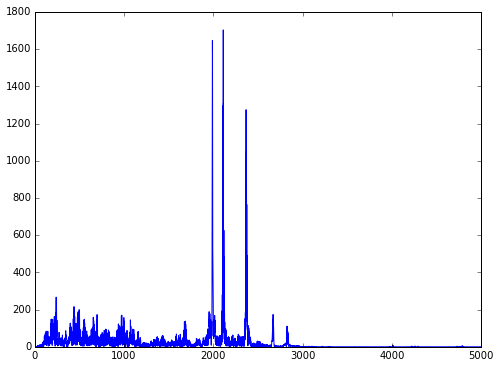

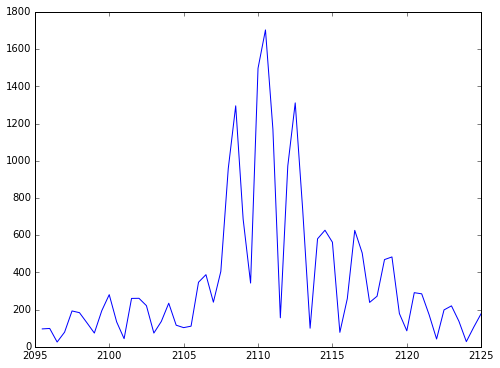

In [59]:
PianoKeyFreq = []
for n in range(1, 89):
    KeyFreq = 2**((n-49.0)/12.0) * 440.0
    PianoKeyFreq.append(KeyFreq)
PianoKeyFreq = np.asarray(PianoKeyFreq)
PianoKeyFreq.shape

isec = 30
ileft = np.round((isec-1.0)*rate)
iright = np.round((isec+1.0)*rate)
y = piano[ileft:iright, 0].astype('float')
y = y / 2**15
yf, ff, df = PianoFFT(y, fs)

fleft = 0
fright = np.round(5000/df)
ifreqmax = np.argmax(yf[fleft:fright])
freqmax = ff[ifreqmax]
yfmax = yf[ifreqmax]
print(ifreqmax, freqmax, yfmax)

yfleft = yf[0:ifreqmax]
ffleft = ff[0:ifreqmax]
ifleft = (yfleft<0.5*yfmax).nonzero()
print(ifleft[0][-1], ffleft[ifleft[0][-1]], yfleft[ifleft[0][-1]])
    
yfright = yf[ifreqmax:-1]
ffright = ff[ifreqmax:-1]
ifright = (yfright<0.5*yfmax).nonzero()
print(ifright[0][0], ffright[ifright[0][0]], yfright[ifright[0][0]])

plt.figure(figsize=(8,6))
plt.plot(ff[fleft:fright], yf[fleft:fright])

plt.figure(figsize=(8,6))
offset = 30
plt.plot(ff[ifreqmax-offset:ifreqmax+offset], yf[ifreqmax-offset:ifreqmax+offset])

if freqmax < 200:
    gap = 2
elif freqmax>=200 and freqmax<1500:
    gap = 3
else:
    gap = 20
pianofind = (np.abs(PianoKeyFreq-freqmax) < gap).nonzero()
print(gap, freqmax, PianoKeyFreq[pianofind[0]])
print(PianoKeyFreq)

1 - isbw=True, bw=2.0, iskey=False, gap=3, keyfind=(array([], dtype=int64),)
2 - piano key find. isbw=True, bw=3.0, iskey=True, gap=3, keyfind=(array([61], dtype=int64),)
3 - piano key find. isbw=True, bw=3.0, iskey=True, gap=3, keyfind=(array([62], dtype=int64),)
4 - piano key find. isbw=True, bw=5.0, iskey=True, gap=3, keyfind=(array([49], dtype=int64),)
5 - piano key find. isbw=True, bw=5.0, iskey=True, gap=3, keyfind=(array([43], dtype=int64),)
6 - piano key find. isbw=True, bw=4.0, iskey=True, gap=3, keyfind=(array([63], dtype=int64),)
7 - piano key find. isbw=True, bw=3.0, iskey=True, gap=3, keyfind=(array([48], dtype=int64),)
8 amp=false
9 - piano key find. isbw=True, bw=3.0, iskey=True, gap=3, keyfind=(array([43], dtype=int64),)
10 - isbw=False, bw=6.0, iskey=True, gap=3, keyfind=(array([40], dtype=int64),)
11 - isbw=False, bw=6.0, iskey=False, gap=3, keyfind=(array([], dtype=int64),)
12 amp=false
13 - piano key find. isbw=True, bw=3.0, iskey=True, gap=2, keyfind=(array([34], d

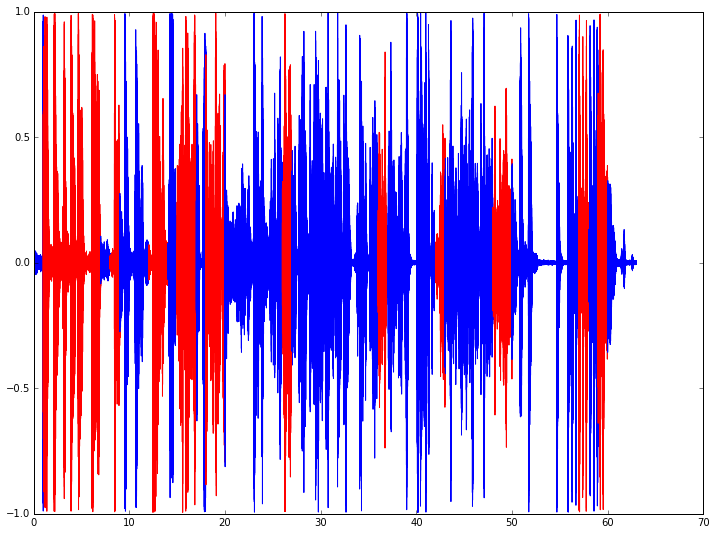

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft
from numpy import hamming, hanning
import scipy.io.wavfile as wavfile
import scipy.signal as signal

def PianoFFT(yt, fs):
    dt = 1.0/fs
    Nt = len(yt)
    tt = np.arange(0, Nt*dt, dt)
    Nf = len(yt)
    df = fs / Nf
    ff = np.arange(0,fs,df)
    yf = np.abs(fft(yt*hanning(Nf)))
    return yf, ff, df


def pianofind(yf, ff):
    ifreqmax = np.argmax(yf)
    freqmax = ff[ifreqmax]
    yfmax = yf[ifreqmax]
    
    yfleft = yf[0:ifreqmax]
    ffleft = ff[0:ifreqmax]
    ifleft = (yfleft<0.75*yfmax).nonzero()
    
    yfright = yf[ifreqmax:]
    ffright = ff[ifreqmax:]
    ifright = (yfright<0.75*yfmax).nonzero()
    
    return freqmax, ffright[ifright[0][0]]-ffleft[ifleft[0][-1]]


rate, piano = wavfile.read('piano.wav')
Nsec = np.floor(piano.shape[0]/rate).astype('int')
#Nsec = 10
fs = 1.0*rate

PianoKeyFreq = []
for n in range(1, 89):
    KeyFreq = 2**((n-49.0)/12.0) * 440.0
    PianoKeyFreq.append(KeyFreq)
PianoKeyFreq = np.asarray(PianoKeyFreq)

ispiano = [False]
for isec in range(1, Nsec-1):
    ileft = np.round((isec-1.0)*rate)
    iright = np.round((isec+0.0)*rate)
    y = piano[ileft:iright, 0].astype('float')
    y = y / 2**15
    
    ymax = np.max(np.abs(y))
    if(ymax > 0.5):
        ispiano_amp = True
    else:
        ispiano_amp = False
        ispiano.append(False)
        print(isec, 'amp=false')
        continue
    
    yf, ff, df = PianoFFT(y, fs)
    fleft = 0
    fright = np.round(5000/df)
    piano_fmax, piano_bw = pianofind(yf[fleft:fright], ff[fleft:fright])
    
    if(piano_bw <6):
        ispiano_bw = True
    else:
        ispiano_bw = False

    if piano_fmax < 200:
        gap = 2
    elif piano_fmax>=200 and piano_fmax<1500:
        gap = 3
    else:
        gap = 4
    pianokeyfind = (np.abs(PianoKeyFreq-piano_fmax) < gap).nonzero()
    if(len(pianokeyfind[0]) > 0):
        ispiano_key = True
    else:
        ispiano_key = False
        
    if(ispiano_bw and ispiano_key):
        ispiano.append(True)
        print('{0:} - piano key find. isbw={1:}, bw={2:}, iskey={3:}, gap={4:}, keyfind={5:}'.\
              format(isec, ispiano_bw, piano_bw, ispiano_key, gap, pianokeyfind))
    else:
        ispiano.append(False)
        print('{0:} - isbw={1:}, bw={2:}, iskey={3:}, gap={4:}, keyfind={5:}'.\
              format(isec, ispiano_bw, piano_bw, ispiano_key, gap, pianokeyfind))

ispiano.append(False)     
#print(ispiano)


plt.figure(figsize=(12,9))
dt = 1.0/fs
for isec in range(1, Nsec):
    ileft = np.round((isec-1.0)*rate)
    iright = np.round((isec+0.0)*rate)
    y = piano[ileft:iright, 0].astype('float')
    y = y / 2**15
    tt = np.arange(isec-1.0, isec, dt)
    if(ispiano[isec]):
        plt.plot(tt[0::10], y[0::10], 'r')
    else:
        plt.plot(tt[0::10], y[0::10], 'b')


In [89]:
import pyaudio

CHUNK = 1024*8
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 1024*8 #44100
RECORD_SECONDS = 5

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    wave = stream.read(CHUNK)
    data = np.fromstring(wave, dtype=np.int16)
    frames.append(data)
    print('i={}'.format(i))

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()



* recording
i=0
i=1
i=2
i=3
i=4
* done recording


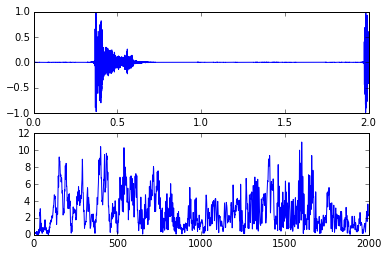

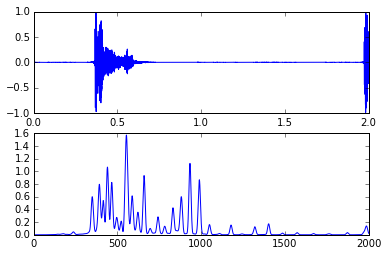

In [99]:
alldata = np.hstack(frames)
alldata.shape
fs=8192
yt = alldata[2*fs:4*fs] / 2**15
yf, ff = PianoFFT(yt, fs=fs)
yf, ff = PianoWelch(yt, fs=fs)
